In [5]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file_path = "C:\\Users\\ASUS\\OneDrive\\Desktop\\Bank churn analysis\\Bank Customer Churn Prediction.csv"
df = pd.read_csv(file_path)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
print("shape:",df.shape)
print("column:",df.columns)

shape: (10000, 12)
column: Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [13]:
df['churn'].value_counts(normalize = True)*100

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

In [ ]:
#churn vs non-churn count
ax = sns.countplot(x='churn',data = df)
plt.title("churn vs Non-churn count")
plt.xlabel("churn(1=yes,0=No)")
plt.ylabel("Number of customers")
for p in ax.patches:
    count = int(p.get_height())
    x=p.get_x() + p.get_width()/2
    y=p.get_height()
    ax.text(x,y + 100,count,ha='center')

plt.show()

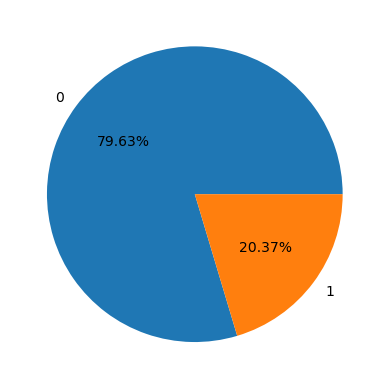

In [15]:
gb = df.groupby("churn").agg({'churn':'count'})
plt.pie(gb['churn'],labels = gb.index,autopct = "%1.2f%%")
plt.show()

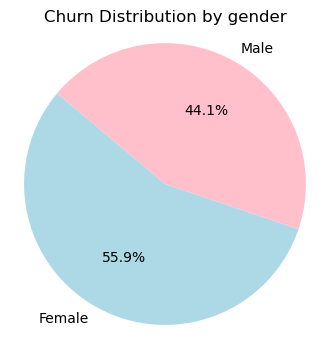

In [16]:
#Churn distribution by gender
churned = df[df['churn'] == 1]
churn_by_gender = churned['gender'].value_counts()
plt.figure(figsize=(4,4))
colors = ['lightblue','pink']
plt.pie(churn_by_gender,labels=churn_by_gender.index,autopct='%1.1f%%',startangle=140,colors=colors)
plt.title('Churn Distribution by gender')
plt.axis('equal')
plt.show()

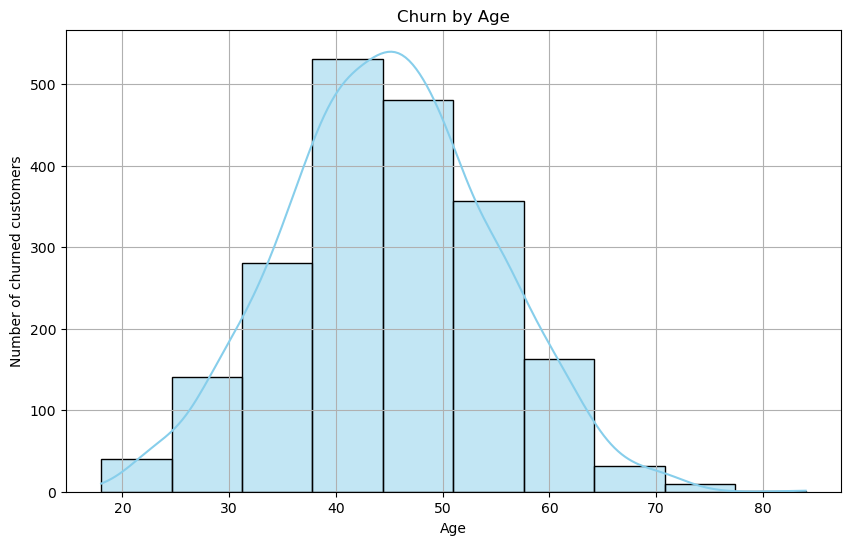

In [21]:
# churn by age
churned = df[df['churn'] == 1]
plt.figure(figsize=(10,6))
sns.histplot(data=churned,x='age',bins=10,kde=True,color='skyblue')
plt.title('Churn by Age')
plt.xlabel('Age')
plt.ylabel('Number of churned customers')
plt.grid(True)
plt.show()


Churn Rate by Tenure:
     tenure  ChurnRate (%)
0        0      23.002421
1        1      22.415459
2        2      19.179389
3        3      21.110010
4        4      20.525784
5        5      20.652174
6        6      20.268873
7        7      17.217899
8        8      19.219512
9        9      21.646341
10      10      20.612245


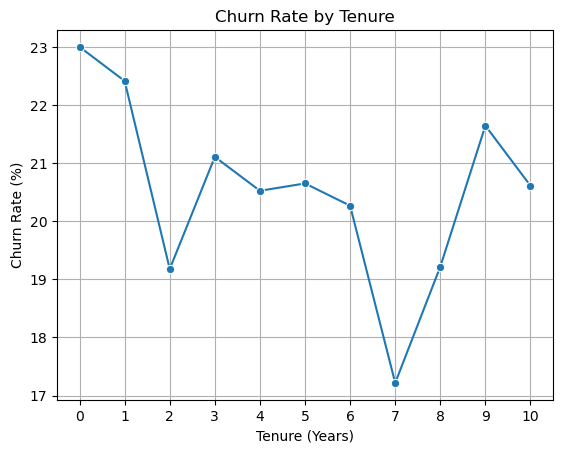

In [26]:
#churn rate by tenure
tenure_churn = df.groupby('tenure')['churn'].mean().reset_index()
tenure_churn['churn'] = tenure_churn['churn'] * 100  # convert to percentage
tenure_churn.rename(columns={'churn': 'ChurnRate (%)'}, inplace=True)


print("\nChurn Rate by Tenure:\n", tenure_churn)


sns.lineplot(x='tenure', y='ChurnRate (%)', data=tenure_churn, marker='o')
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Churn Rate (%)")
plt.xticks(range(df['tenure'].min(), df['tenure'].max() + 1))
plt.grid(True)
plt.show()

['France' 'Spain' 'Germany']

Churn Rate by Geography:
    country  ChurnRate (%)
0   France      16.154767
1  Germany      32.443204
2    Spain      16.673395


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21192\3719001437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='country', y='ChurnRate (%)', data=geo_churn, palette='Set2')


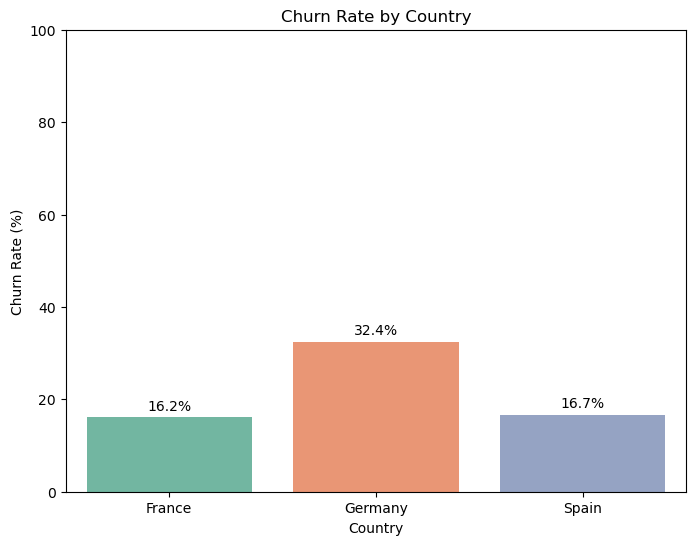

In [30]:
#Churn rate by country
print(df['country'].unique())


geo_churn = df.groupby('country')['churn'].mean().reset_index()
geo_churn['churn'] = geo_churn['churn'] * 100  # Convert to percentage
geo_churn.rename(columns={'churn': 'ChurnRate (%)'}, inplace=True)


print("\nChurn Rate by Geography:\n", geo_churn)


plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='country', y='ChurnRate (%)', data=geo_churn, palette='Set2')


for i in barplot.containers:
    barplot.bar_label(i, fmt='%.1f%%', label_type='edge', padding=3)
plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Country")
plt.ylim(0, 100)
plt.show()

active_member
1    5151
0    4849
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21192\192162440.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Status', y='ChurnRate (%)', data=active_churn, palette='pastel')


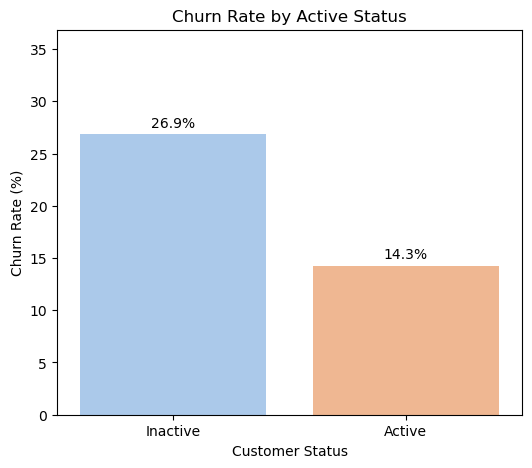


Churn Rate by Active Status:
      Status  ChurnRate (%)
0  Inactive      26.850897
1    Active      14.269074


In [31]:
#Churn rate by active status
print(df['active_member'].value_counts())


active_churn = df.groupby('active_member')['churn'].mean().reset_index()
active_churn['churn'] = active_churn['churn'] * 100  # convert to percentage
active_churn.rename(columns={'churn': 'ChurnRate (%)'}, inplace=True)


active_churn['Status'] = active_churn['active_member'].map({1: 'Active', 0: 'Inactive'})


plt.figure(figsize=(6, 5))
barplot = sns.barplot(x='Status', y='ChurnRate (%)', data=active_churn, palette='pastel')


for i in barplot.containers:
    barplot.bar_label(i, fmt='%.1f%%', label_type='edge', padding=3)

plt.title("Churn Rate by Active Status")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Customer Status")
plt.ylim(0, active_churn['ChurnRate (%)'].max() + 10)
plt.show()


print("\nChurn Rate by Active Status:\n", active_churn[['Status', 'ChurnRate (%)']])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21192\4067387245.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df.groupby('BalanceGroup')['churn'].mean().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21192\4067387245.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='BalanceGroup', y='ChurnRate (%)', data=balance_churn, palette='Blues')


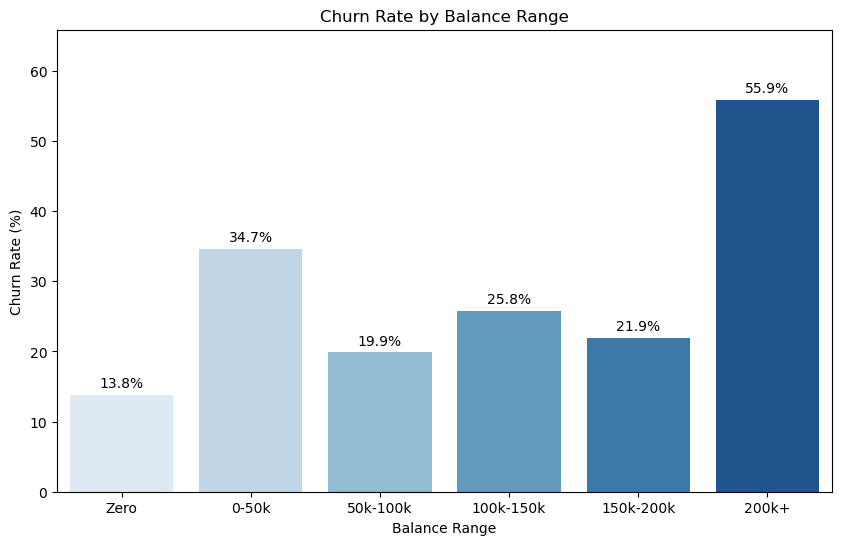


Churn Rate by Balance Group:
   BalanceGroup  ChurnRate (%)
0         Zero      13.823611
1        0-50k      34.666667
2     50k-100k      19.880716
3    100k-150k      25.770235
4    150k-200k      21.925134
5        200k+      55.882353


In [32]:
#Churn rate by balance range
bins = [0, 1, 50000, 100000, 150000, 200000, df['balance'].max()]
labels = ['Zero', '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

df['BalanceGroup'] = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True)


balance_churn = df.groupby('BalanceGroup')['churn'].mean().reset_index()
balance_churn['churn'] = balance_churn['churn'] * 100
balance_churn.rename(columns={'churn': 'ChurnRate (%)'}, inplace=True)


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='BalanceGroup', y='ChurnRate (%)', data=balance_churn, palette='Blues')


for i in barplot.containers:
    barplot.bar_label(i, fmt='%.1f%%', label_type='edge', padding=3)


plt.title("Churn Rate by Balance Range")
plt.xlabel("Balance Range")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, balance_churn['ChurnRate (%)'].max() + 10)
plt.show()


print("\nChurn Rate by Balance Group:\n", balance_churn)

In [35]:
def customer_segment(row):
    if row['churn'] == 1 and row['balance'] > 100000:
        return 'High Balance - Churned'
    elif row['churn'] == 1 and row['active_member'] == 0:
        return 'Inactive - Churned'
    elif row['churn'] == 0 and row['active_member'] == 1:
        return 'Active - Retained'
    elif row['churn'] == 0 and row['balance'] < 50000:
        return 'Low Balance - Retained'
    elif row['churn'] == 1 and row['credit_score'] > 750:
        return 'High CreditScore - Churned'
    else:
        return 'Others'

df['Segment'] = df.apply(customer_segment, axis=1)

In [36]:
#Churn rate by customer segment
print(df['Segment'].value_counts())


segment_churn = df.groupby('Segment')['churn'].mean().reset_index()
segment_churn['churn'] *= 100
segment_churn.rename(columns={'churn': 'ChurnRate (%)'}, inplace=True)
print(segment_churn)

Segment
Active - Retained             4416
Others                        2360
Low Balance - Retained        1441
High Balance - Churned        1211
Inactive - Churned             530
High CreditScore - Churned      42
Name: count, dtype: int64
                      Segment  ChurnRate (%)
0           Active - Retained       0.000000
1      High Balance - Churned     100.000000
2  High CreditScore - Churned     100.000000
3          Inactive - Churned     100.000000
4      Low Balance - Retained       0.000000
5                      Others      10.762712


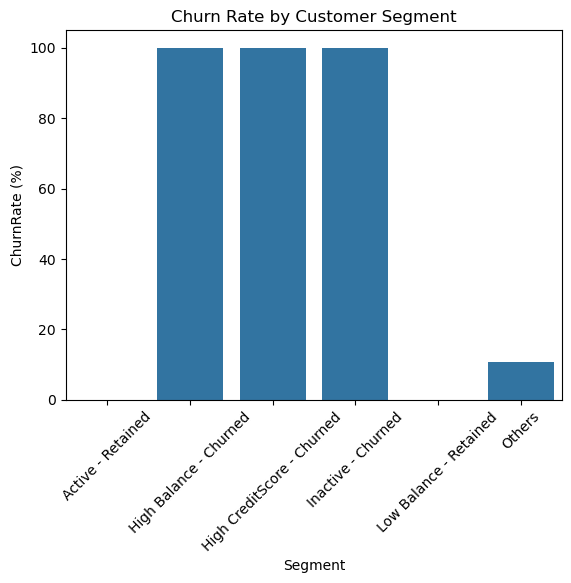

In [42]:
sns.barplot(x='Segment', y='ChurnRate (%)', data=segment_churn)
plt.xticks(rotation=45)
plt.title("Churn Rate by Customer Segment")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21192\2127244425.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_by_score, x='CreditScoreGroup', y='churn', palette='coolwarm')


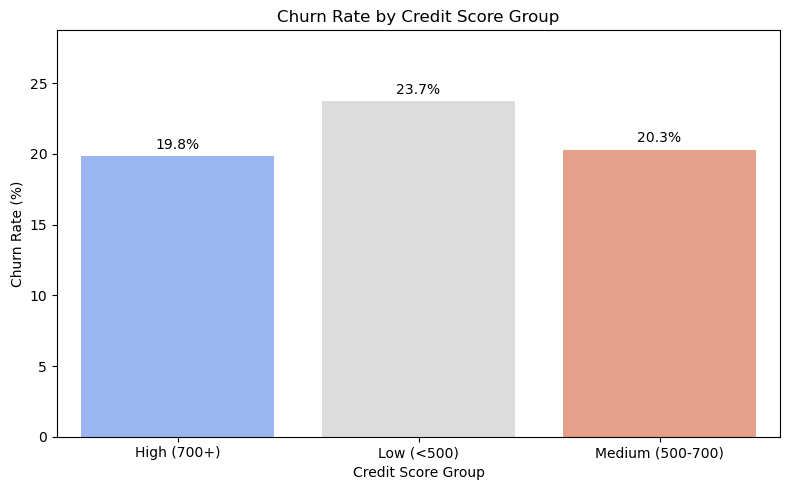

In [45]:
#Churn rate by Credit score group
def credit_score_group(score):
    if score < 500:
        return 'Low (<500)'
    elif 500 <= score < 700:
        return 'Medium (500-700)'
    else:
        return 'High (700+)'

df['CreditScoreGroup'] = df['credit_score'].apply(credit_score_group)


churn_rate_by_score = df.groupby('CreditScoreGroup')['churn'].mean().reset_index()
churn_rate_by_score['churn'] = churn_rate_by_score['churn'] * 100  # to percentage




plt.figure(figsize=(8,5))
sns.barplot(data=churn_rate_by_score, x='CreditScoreGroup', y='churn', palette='coolwarm')


for index, row in churn_rate_by_score.iterrows():
    plt.text(x=index, y=row['churn'] + 0.5, s=f"{row['churn']:.1f}%", ha='center', fontsize=10)

plt.title("Churn Rate by Credit Score Group")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Credit Score Group")
plt.ylim(0, max(churn_rate_by_score['churn']) + 5)
plt.tight_layout()
plt.show()